In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from tools import kaczmarz_method, sparse
from plot_tools import plot_residuals, plot_errors

import warnings
warnings.filterwarnings('ignore')

In [2]:
#@title : Matplotlib configuration

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

SMALL_SIZE = 10 
MEDIUM_SIZE = 12 
BIGGER_SIZE = 14 

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['text.usetex'] = True

  # activate latex text rendering
plt.rc('axes', linewidth=2)
plt.rc('font', weight='bold')

plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [3]:
# Fixing random state for reproducibility
np.random.seed(1234)

In [4]:
# Create the toy example

# Run this notebook to produce different plots in the paper:
#     (m, n) = (200, 600) for figure 12

m = 200 # number of equation
n = 600 # number of unknown

In [5]:
s = 10  # number of nonzeros in solution

A = np.random.randn(m,n) 
x_true = sparse(np.random.randn(n,1),s)

noiselev = 0.0

b = A @ x_true

noise = np.random.randn(m,1)
noise = noise/np.linalg.norm(noise)

b_noisy = b + noiselev*noise

print(A.shape, x_true.shape, b.shape, s)

(200, 600) (600, 1) (200, 1) 10


# Effect of $\lambda$ in terms of $\eta$ on the convergence

In [6]:
methods = ['RSK', 'RSKA' ]

lambda_list = [i/10 for i in range(31)] 

########################################################3
W_rsk = [1 for _ in range(m)] 


eta_rsk = 1
eta_rska = 21 

squared_row_norms = np.linalg.norm(A, axis=1) ** 2
Fnorm = squared_row_norms.sum()

_, max_A, _ = np.linalg.svd(A, full_matrices=True)

smax = max_A[0]**2/Fnorm
smin = max_A[-1]**2/Fnorm
eta_opt = int(np.ceil(1/smax))

if (smax - smin) <= 1/(eta_rska - 1):
    print('On the first case')
    alpha_rska = eta_rska/(1 + (eta_rska-1)*smax)
    print(f' alpha = {alpha_rska}, eta = {eta_rska}, eta_opt = {np.ceil(1/smax)}')

elif (smax - smin) > 1/(eta_rska - 1):
    print('On the second case')
    alpha_rska = (2*eta_rska)/(1 + (eta_rska-1)*(smin+smax))
    print(f' alpha = {alpha_rska}, eta = {eta_rska}, eta_opt = {np.ceil(1/smax)}')

W_rska = [alpha_rska for _ in range(m)] 

########################################################3

eta_lambda_results = dict()
for method in methods:
    eta_lambda_results[method] = dict()


for method in methods:
    
    residual = []
    error = []
    for lmbda in lambda_list:
        iterations = 1000
        itera = iterations + int(lmbda*1000)
        if method == 'RSK':
            Result = kaczmarz_method(A, b, eta_rsk,  x_true, W_rsk, itera, bN=b_noisy, lbda=lmbda)
        elif method == 'RSKA':
            Result = kaczmarz_method(A, b, eta_rska,  x_true, W_rska, itera, bN=b_noisy, lbda=lmbda)
        residual.append(Result[1][-1])
        error.append(Result[2][-1])

    eta_lambda_results[method]['residuals'] = residual
    eta_lambda_results[method]['errors'] = error

On the first case
 alpha = 16.847979522029277, eta = 21, eta_opt = 82.0


In [7]:
#@title : Plot for effect of $\lambda$ in terms of $\eta$


def plot_residual(results, label):
    plt.figure(figsize=(6,6))
    X = [i/10 for i in range(31)]
    for key in list(results.keys()):
        plt.plot(X, results[key]['residuals'], label = '{}'.format(key))

    plt.xlabel(r'$\mathbf{\lambda}$', fontsize=12)
    plt.yscale('log')
    plt.ylabel(r'$\mathbf{\|Ax - b\|/\|b\|}$', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.savefig('residualsfor_{}.png'.format(label), format='png', dpi=200,bbox_inches='tight')
    plt.show()


def plot_error(results, label):
    plt.figure(figsize=(6,6))
    X = [i/10 for i in range(31)]
    for key in list(results.keys()):
        plt.plot(X, results[key]['errors'], label = '{}'.format(key) )

    plt.xlabel(r'$\mathbf{\lambda}$', fontsize=12)
    plt.yscale('log')
    plt.ylabel(r'$\mathbf{\|x - \hat x\|/\|\hat x\|}$', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.savefig('errorfor{}.png'.format(label), format='png', dpi=200,bbox_inches='tight')
    plt.show()

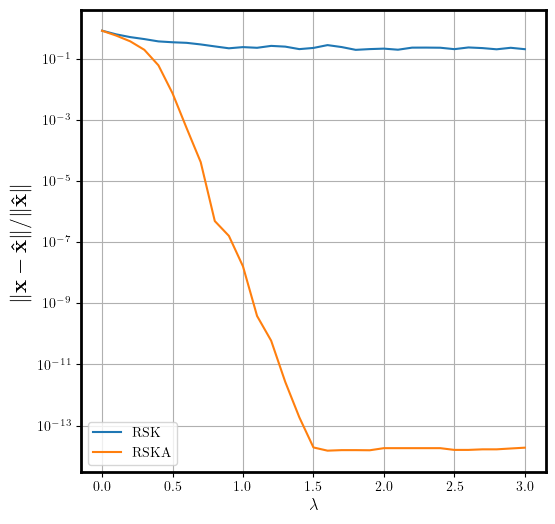

In [8]:
plot_error(eta_lambda_results, 'lambda')

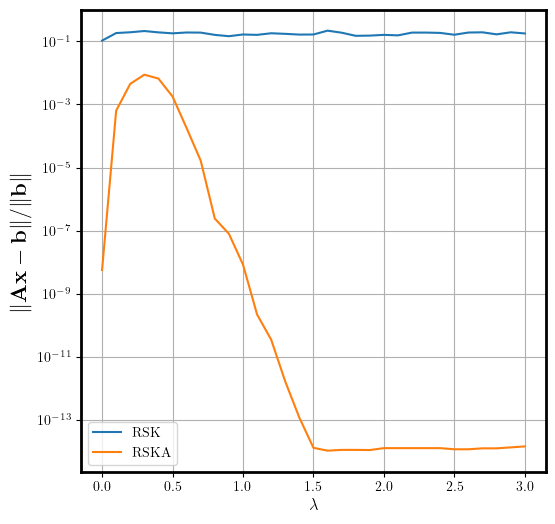

In [9]:
plot_residual(eta_lambda_results, 'lambda')

In [ ]:
methods = ['RSK', 'RSKA' ]

lambda_list = [i/10 for i in range(31)] 

########################################################3
W_rsk = [1 for _ in range(m)] 

eta_rsk = 1
eta_rska = 21 

squared_row_norms = np.linalg.norm(A, axis=1) ** 2
Fnorm = squared_row_norms.sum()

_, max_A, _ = np.linalg.svd(A, full_matrices=True)

smax = max_A[0]**2/Fnorm
smin = max_A[-1]**2/Fnorm
eta_opt = int(np.ceil(1/smax))

if (smax - smin) <= 1/(eta_rska - 1):
    print('On the first case')
    alpha_rska = eta_rska/(1 + (eta_rska-1)*smax)
    print(f' alpha = {alpha_rska}, eta = {eta_rska}, eta_opt = {np.ceil(1/smax)}')

elif (smax - smin) > 1/(eta_rska - 1):
    print('On the second case')
    alpha_rska = (2*eta_rska)/(1 + (eta_rska-1)*(smin+smax))
    print(f' alpha = {alpha_rska}, eta = {eta_rska}, eta_opt = {np.ceil(1/smax)}')

W_rska = [alpha_rska for _ in range(m)] 

########################################################3

eta_lambda_results = dict()
for method in methods:
    eta_lambda_results[method] = dict()


for method in methods:
    
    residual = []
    error = []
    for lmbda in lambda_list:
        iterations = 1000
        if method == 'RSK':
            Result = kaczmarz_method(A, b, eta_rsk,  x_true, W_rsk, iterations, bN=b_noisy, lbda=lmbda)
        elif method == 'RSKA':
            Result = kaczmarz_method(A, b, eta_rska,  x_true, W_rska, iterations, bN=b_noisy, lbda=lmbda)
        residual.append(Result[1][-1])
        error.append(Result[2][-1])

    eta_lambda_results[method]['residuals'] = residual
    eta_lambda_results[method]['errors'] = error

On the first case
 alpha = 16.847979522029277, eta = 21, eta_opt = 82.0


In [ ]:
plot_error(eta_lambda_results, 'lambda')

In [ ]:
plot_residual(eta_lambda_results, 'lambda')